# Flight Delays project




# Initial setup

## Required libraries and modules
Pandas, Matplotlib and Math are required, so we must import them before anything else.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Csv paths

Before importing the flight data, the csv file paths are required. The primary file (csv_flights) contains all the flight data, while the other two (csv_airports, csv_airlines) represent, respectively, airport and airline company listings.

In [2]:
csv_directory = 'Data/'
csv_flights = csv_directory + 'Flights/850566403_T_ONTIME.csv'
csv_airports = csv_directory + 'Airports/L_AIRPORT_ID.csv'
csv_airlines = csv_directory + 'Airlines/L_AIRLINE_ID.csv'


We then would call the atrasos() method, which would start by converting the csv data into dataframes. For the purpose of this notebook, however, we're not defining the method, so we skip right into converting the csv data into dataframes and then go from there.

In [3]:
# Atrasos.atrasos(csv_flights, csv_airports, csv_airlines)

In [4]:
df_flights = pd.read_csv(csv_flights)
print(df_flights.head())

   YEAR  MONTH  AIRLINE_ID  DEST_AIRPORT_ID  ARR_DELAY_NEW  Unnamed: 5
0  2015      2       19805            12892            0.0         NaN
1  2015      2       19805            12892            NaN         NaN
2  2015      2       19805            12892            0.0         NaN
3  2015      2       19805            12892            0.0         NaN
4  2015      2       19805            12892            0.0         NaN


In [5]:
df_airports = pd.read_csv(csv_airports)
print(df_airports.head())

    Code                                    Description
0  10001         Afognak Lake, AK: Afognak Lake Airport
1  10003  Granite Mountain, AK: Bear Creek Mining Strip
2  10004                       Lik, AK: Lik Mining Camp
3  10005         Little Squaw, AK: Little Squaw Airport
4  10006                     Kizhuyak, AK: Kizhuyak Bay


In [6]:
df_airlines = pd.read_csv(csv_airlines)
print(df_airlines.head())

    Code                      Description
0  19031   Mackey International Inc.: MAC
1  19032  Munz Northern Airlines Inc.: XY
2  19033       Cochise Airlines Inc.: COC
3  19034   Golden Gate Airlines Inc.: GSA
4  19035               Aeromech Inc.: RZZ


## Data preprocessing

Data must be preprocessed and cleaned, removing any flights with missing values.
NOTE: for now, we're only checking for missing delay values, but we probably should also be checking for any other missing value: airport, airline, etc). Furthermore, we're only checking for missing values on the flight data, so we might want to check the other two dataframes for missing id's and descriptions.

In [7]:
df_flights.dropna(subset=['ARR_DELAY_NEW'], inplace=True)

print(df_flights.head())

   YEAR  MONTH  AIRLINE_ID  DEST_AIRPORT_ID  ARR_DELAY_NEW  Unnamed: 5
0  2015      2       19805            12892            0.0         NaN
2  2015      2       19805            12892            0.0         NaN
3  2015      2       19805            12892            0.0         NaN
4  2015      2       19805            12892            0.0         NaN
5  2015      2       19805            12892            0.0         NaN


## Date (month, year)

This set of files should correspond to one month and one month alone, so we get the month and the year from the first record in the flight data csv. This info will be used later on to create a figure title that automatically includes the month and year on which the data was collected.

In [8]:
month = df_flights.iloc[0]['MONTH']
year = df_flights.iloc[0]['YEAR']

A custom function allows us to convert the month and year into a text representation to be displayed on the chart.

In [9]:
def month_year_as_text(mes, ano):
    """ Converts a (month, year) tuple into its corresponding text
        representation. """
    dict_meses = {1: 'janeiro', 2: 'fevereiro', 3: 'março', 
                  4: 'abril', 5: 'maio', 6: 'junho', 
                  7: 'julho', 8: 'agosto', 9: 'setembro', 
                  10: 'outubro', 11: 'novembro', 12: 'dezembro'}
    string = dict_meses[int(mes)] + ' de ' + str(int(ano))
    return string

month_year_string = month_year_as_text(month, year)

# Delay estimation

## Average delay per airline company

We then proceed to estimate each of the four separate delays. We'll start by calculating the average delay per airline company, which would be done by calling the atraso_medio_companhia() method. Once again, for the purpose of this notebook, we're not defining the method.

In [10]:
# avg_companhia = Atrasos.atraso_medio_companhia(df_flights, df_airlines)

### Assign airline id column
In order to be able to estimate the average delay per company, we must be able to assign each flight to its corresponding airline company. Therefore, we need to assign a variable (``id_col``) that indicates the name of the column that indicates the airline for each flight.

In [11]:
id_col = 'AIRLINE_ID'

(We then would call the atraso_medio() method)

In [12]:
# x, y = atraso_medio(df_flights, df_airline_ids, id_col)

### Merge flight and airline descriptions' data
Before using a pivot table to estimate the delay info we need, we 
    merge both dataframes - the one holding all the flight data with the 
    other one, which assigns an airline company name to each airline_id.
    In order to be able to merge the dataframes, we need to provide a
    column on each dataframe - the dataframes will then be merged using 
    those two columns, dropping the repeated right-sided column ('Code') 
    along the way.

NOTE: We could also merge the airline names after setting up the
    pivot table. Which option makes more sense?

In [13]:
df = pd.merge(df_flights, df_airlines, left_on=id_col, right_on='Code', how='left').drop('Code', axis=1)
print(df.head())

   YEAR  MONTH  AIRLINE_ID  DEST_AIRPORT_ID  ARR_DELAY_NEW  Unnamed: 5  \
0  2015      2       19805            12892            0.0         NaN   
1  2015      2       19805            12892            0.0         NaN   
2  2015      2       19805            12892            0.0         NaN   
3  2015      2       19805            12892            0.0         NaN   
4  2015      2       19805            12892            0.0         NaN   

                  Description  
0  American Airlines Inc.: AA  
1  American Airlines Inc.: AA  
2  American Airlines Inc.: AA  
3  American Airlines Inc.: AA  
4  American Airlines Inc.: AA  


### Set the variables for the creation of a pivot table
We'll be using a pivot table to estimate the delay info we need. The pivot table will allow us to easily aggregate the delay values by airline company and then estimate the average delay for each of them. Before doing so, though, we must provide both the column holding the values that will be aggregated, as well as the function to aggregate the values.

In [14]:
aggcol = 'ARR_DELAY_NEW'
aggfunc = 'mean'

### Pivot table creation
At last, we create the pivot table.

In [15]:
pivot = df.pivot_table(values = aggcol,
                       index = 'Description',
                       columns = ['YEAR','MONTH'],
                       aggfunc = aggfunc)
print(pivot.head())

YEAR                               2015
MONTH                                 2
Description                            
Alaska Airlines Inc.: AS       8.588710
American Airlines Inc.: AA    14.775040
Delta Air Lines Inc.: DL      13.791434
Envoy Air: MQ                 25.726775
ExpressJet Airlines Inc.: EV  16.367480


### Sort the data in ascending order
We then sort in ascending order the values obtained...

In [16]:
pivot.sort_values(by=pivot.columns[0], inplace=True)
print(pivot.head())

YEAR                                                     2015
MONTH                                                       2
Description                                                  
Alaska Airlines Inc.: AS                             8.588710
Hawaiian Airlines Inc.: HA                           9.037242
Southwest Airlines Co.: WN                          10.557139
US Airways Inc.: US (Merged with America West 9...  13.734084
Delta Air Lines Inc.: DL                            13.791434


### Shorten the airline company names
...and change the airline companies to be, at most, 10 chars long.

In [17]:
pivot.index = [s[:10].strip() for s in pivot.index]
print(pivot.index)

Index(['Alaska Air', 'Hawaiian A', 'Southwest', 'US Airways', 'Delta Air',
       'United Air', 'American A', 'Virgin Ame', 'SkyWest Ai', 'ExpressJet',
       'Spirit Air', 'JetBlue Ai', 'Envoy Air:', 'Frontier A'],
      dtype='object')


### Return the chart coordinates
We then convert x and y (the variables holding the values that we
    want to have plotted) to lists. x and y together make up a tuple and 
    are hold all the info that's required to plot the average delay per 
    airline company chart. Nonetheless, we're not doing that yet, as we're
    still missing the other three delay estimations.

In [18]:
print(type(pivot.index))
print(type(pivot.values))

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


In [19]:

x = list(pivot.index)
y = [val[0] for val in pivot.values]
avg_delay_per_airline = (x, y)

## Delay ratio per airline company
We move on to the next delay estimation - the ratio of delayed flights
    per airline company (outside of this notebook, we would call the 
    racio_atrasos_companhia() method).

In [20]:
# racio_companhia = Atrasos.racios_atrasos_companhia(df_flights, df_airlines)

In order to calculate the ratio, we proceed exactly as we did with 
    the earlier estimate (average delay), except that we take one 
    additional small step right after assigning the appropriate column 
    name to id_col, where we create a new column in the dataframe that 
    indicates whether a flight was delayed or not. We then indicate that 
    column as the column that will be aggregated. This will allow us later 
    on to easily estimate the desired delay ratio by simply averaging the 
    aggregated values for this column per airline company.

In [21]:
id_col = 'AIRLINE_ID'
delay_threshold = 0
is_delay = lambda x: x > delay_threshold
df_flights['IS_DELAY'] = df_flights['ARR_DELAY_NEW'].transform(is_delay)
print(df_flights.head())

aggcol = 'IS_DELAY'
aggfunc = 'mean'

   YEAR  MONTH  AIRLINE_ID  DEST_AIRPORT_ID  ARR_DELAY_NEW  Unnamed: 5  \
0  2015      2       19805            12892            0.0         NaN   
2  2015      2       19805            12892            0.0         NaN   
3  2015      2       19805            12892            0.0         NaN   
4  2015      2       19805            12892            0.0         NaN   
5  2015      2       19805            12892            0.0         NaN   

   IS_DELAY  
0     False  
2     False  
3     False  
4     False  
5     False  


And then we proceed exactly like before.

In [22]:
df = pd.merge(df_flights, df_airlines, left_on=id_col, right_on='Code', 
              how='left').drop('Code', axis=1)
print(df.head())

   YEAR  MONTH  AIRLINE_ID  DEST_AIRPORT_ID  ARR_DELAY_NEW  Unnamed: 5  \
0  2015      2       19805            12892            0.0         NaN   
1  2015      2       19805            12892            0.0         NaN   
2  2015      2       19805            12892            0.0         NaN   
3  2015      2       19805            12892            0.0         NaN   
4  2015      2       19805            12892            0.0         NaN   

   IS_DELAY                 Description  
0     False  American Airlines Inc.: AA  
1     False  American Airlines Inc.: AA  
2     False  American Airlines Inc.: AA  
3     False  American Airlines Inc.: AA  
4     False  American Airlines Inc.: AA  


In [23]:
pivot = df.pivot_table(values = aggcol,
                       index = 'Description',
                       columns = ['YEAR','MONTH'],
                       aggfunc = aggfunc)
print(pivot.head())

YEAR                              2015
MONTH                                2
Description                           
Alaska Airlines Inc.: AS      0.329814
American Airlines Inc.: AA    0.410194
Delta Air Lines Inc.: DL      0.365126
Envoy Air: MQ                 0.568633
ExpressJet Airlines Inc.: EV  0.458231


In [24]:
pivot.sort_values(by=pivot.columns[0], inplace=True)
print(pivot.head())

YEAR                            2015
MONTH                              2
Description                         
Alaska Airlines Inc.: AS    0.329814
Delta Air Lines Inc.: DL    0.365126
Southwest Airlines Co.: WN  0.389582
Virgin America: VX          0.395412
American Airlines Inc.: AA  0.410194


In [25]:
pivot.index = [s[:10].strip() for s in pivot.index]
print(pivot.index)

Index(['Alaska Air', 'Delta Air', 'Southwest', 'Virgin Ame', 'American A',
       'United Air', 'SkyWest Ai', 'US Airways', 'ExpressJet', 'Hawaiian A',
       'Spirit Air', 'JetBlue Ai', 'Envoy Air:', 'Frontier A'],
      dtype='object')


In [26]:
x = list(pivot.index)
y = [val[0] for val in pivot.values]
delay_ratio_per_airline = (x, y)

For the other two delay estimations (average delay and delay ratio 
    per destination airport), we proceed exactly like we did earlier when
    estimating both of them for airline companies, except for the fact
    that we must change id_col from 'AIRLINE_ID' to 'DEST_AIRPORT_ID'. 
    Everything else is exactly the same.

## Average delay per destination airport

In [27]:
id_col = 'DEST_AIRPORT_ID'
aggcol = 'ARR_DELAY_NEW'
aggfunc = 'mean'

df = pd.merge(df_flights, df_airports, left_on=id_col, right_on='Code', 
              how='left').drop('Code', axis=1)

pivot = df.pivot_table(values = aggcol,
                       index = 'Description',
                       columns = ['YEAR','MONTH'],
                       aggfunc = aggfunc)
    
pivot.sort_values(by=pivot.columns[0], inplace=True)

pivot.index = [s[:10].strip() for s in pivot.index]
print(pivot)

x = list(pivot.index)
y = [val[0] for val in pivot.values]
avg_delay_per_airport = (x, y)

YEAR             2015
MONTH               2
Vernal, UT   0.416667
Butte, MT:   2.000000
Elko, NV:    2.192308
Pocatello,   2.538462
Bemidji, M   3.107143
...               ...
Waterloo,   36.260870
Dubuque, I  38.218750
Marquette,  38.913043
Sioux City  40.545455
Trenton, N  60.536458

[315 rows x 1 columns]


## Delay ratio per destination airport

In [28]:
id_col = 'DEST_AIRPORT_ID'
delay_threshold = 0
is_delay = lambda x: x > delay_threshold
df_flights['IS_DELAY'] = df_flights['ARR_DELAY_NEW'].transform(is_delay)

aggcol = 'IS_DELAY'
aggfunc = 'mean'

df = pd.merge(df_flights, df_airports, left_on=id_col, right_on='Code', 
              how='left').drop('Code', axis=1)

pivot = df.pivot_table(values = aggcol,
                       index = 'Description',
                       columns = ['YEAR','MONTH'],
                       aggfunc = aggfunc)
    
pivot.sort_values(by=pivot.columns[0], inplace=True)

pivot.index = [s[:10].strip() for s in pivot.index]
print(pivot)

x = list(pivot.index)
y = [val[0] for val in pivot.values]
delay_ratio_per_airport = (x, y)

YEAR            2015
MONTH              2
Vernal, UT  0.041667
Lewiston,   0.166667
Brainerd,   0.170213
Wrangell,   0.188679
Moab, UT:   0.191489
...              ...
Trenton, N  0.750000
Waterloo,   0.760870
Dubuque, I  0.765625
Sioux City  0.772727
Guam, TT:   0.857143

[315 rows x 1 columns]


# Plotting the delay charts

We now have the required data to plot the four delay charts, so 
    we can finally create the figure that will hold the four subplots,
    where we'll be able to plot each of the four charts later on.
    
In this case, since we know that we have four charts to plot and that we 
want to arrange them in two columns, the number of rows is quite 
straightforward: two as well. If we had a different setup/layout
in mind, however, it would be helpful to be able to determine the
number of rows automatically.

In [29]:
ncols = 2
ncharts = 4
nrows = math.ceil(ncharts/ncols)

## Create a figure
We then create a figure with 4 subplots, split across 2 rows and 2 
    columns. 'fig' holds the figure object, while 'axs' is an iterable
    containing the four subplot objects. We can access each of the
    four individual subplots by indexing axs (i.e. ``axs[nrow][ncol]``). In 
    this case, the four subplots are ``axs[0][0]``, ``axs[0][1]``, ``axs[1][0]`` and
    ``axs[1][1]``.

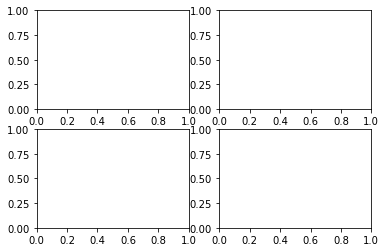

In [30]:
fig, axs = plt.subplots(nrows, ncols)

### Set the figure layout
We then define the figure settings...

In [31]:
plt.style.use('seaborn')
fig.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
                    right = 0.9,    # the right side of the subplots of the figure
                    bottom = 0.1,   # the bottom of the subplots of the figure
                    top = 0.85,     # the top of the subplots of the figure
                    wspace = 0.35,  # the amount of width reserved for blank space between subplots
                    hspace = 0.7)   # the amount of height reserved for white space between subplots

### Set the figure title
...and set the figure title.

In [32]:
fig.suptitle(f"Atrasos à chegada na aviação comercial ({month_year_string})")

Text(0.5, 0.98, 'Atrasos à chegada na aviação comercial (fevereiro de 2015)')

## Plot the charts
Once a figure has been created, we can start plotting the charts on
    each figure subplot. We set up a for loop and run through the 
    available subplots, matching each one with a separate delay chart.
    In order to plot each chart, we create a dataframe from each (x, y)
    delay tuple, and since we only want the top 10 to be displayed, 
    reduce it to 10 elements.

In [33]:
charts = [avg_delay_per_airline, delay_ratio_per_airline,
          avg_delay_per_airport, delay_ratio_per_airport]
for index, chart in enumerate(charts):
    """ Find the subplot index for the current loop iteration """
    fig_row = index // ncols
    fig_col = index % ncols
    """ Assign the indexed subplot to a variable """
    subplot_r_c = axs[fig_row, fig_col]
    """ Create a dataframe from the (x, y) tuple """
    df = pd.DataFrame(chart[1], index=chart[0]) 
    """ Ensure the chart displays only the top 10 elements """
    max_nr_elements = 10
    df = df[-max_nr_elements:]
    """ Create a bar chart on the subplot ('ax=subplot_r_c') """
    df.plot.bar(ax=subplot_r_c, rot=45, fontsize=8, legend=None, edgecolor="black")
    """ Set the layout of the chart """
    subplot_r_c.tick_params(axis='x', which='major', pad=1)
    subplot_r_c.set_xticklabels(labels=df.index, verticalalignment="top", horizontalalignment="right", rotation_mode="anchor")
    subplot_r_c.set_title("\nAtraso médio por " + "companhia aérea" + " (top10)")
    subplot_r_c.set_ylabel("Minutos", fontsize=8)

## Display the figure
NOTE: Still displaying wrong chart titles and labels!

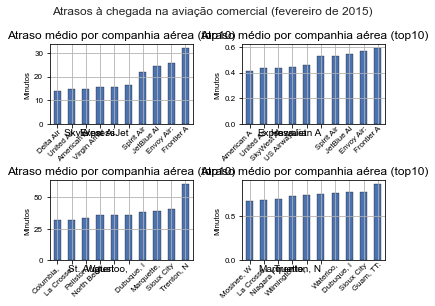

In [34]:
fig